<a href="https://colab.research.google.com/github/ckstrouse/CA01-Exploratory-Data-Analysis-/blob/main/CA01_Exploratory_Data_Analysis_%E2%80%93_House_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


For this data set and and anylasis we will be using Pandas and NumPy  for data manipulation and numerical operations, while Matplotlib and Seaborn in order to visualize patterns and distributions within the dataset.

Read our dataset in via Github

In [7]:
house = "https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv"

df = pd.read_csv(house)


Data Understanding Section

Goal: Understand the code, variables, data types, Figure out issues with the data set, any outliers or missing values that we can fix for the next section.

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


First five columns we can already see missing values.

In [9]:
df.shape


(1460, 81)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We can see from the above that there are columns with missing values  some numeric and categorical data.

In [11]:
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


From the summary statistics, several variables, including SalePrice and LotArea, show large differences between their median and maximum values, which  indicates the presence of outliers typical of the housing market.

In [12]:
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_count[missing_count > 0]


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


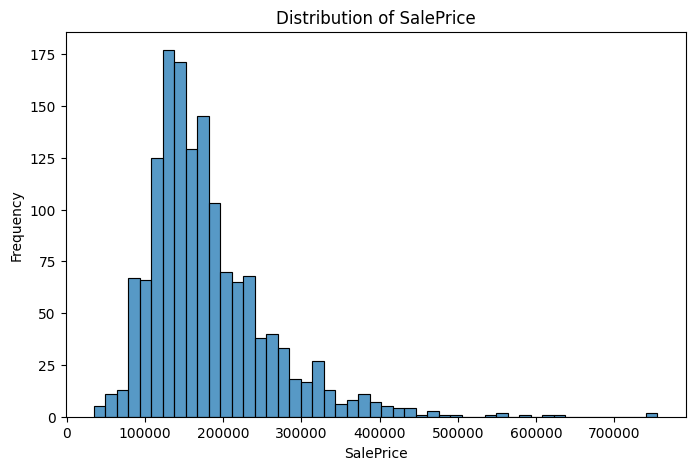

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'])
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')

plt.ylabel('Frequency')
plt.show()


Furthermore The histogram shows that the SalePrice distribution is right skewed, with most properties concentrated in lower price ranges and a long tail of higher priced homes. The boxplot confirms the presence of several high value outliers.

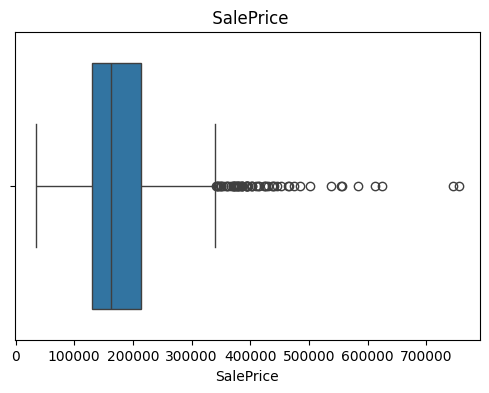

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['SalePrice'])
plt.title(' SalePrice')

plt.show()


In [15]:
df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)


,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [16]:
df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)


,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


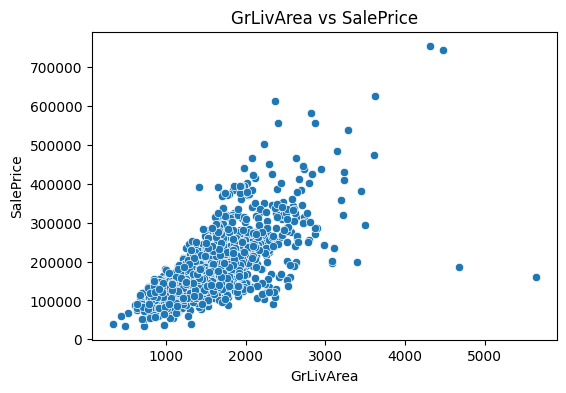

In [17]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('GrLivArea vs SalePrice')
plt.show()


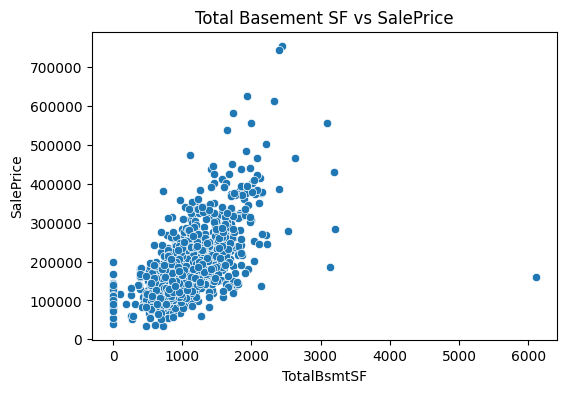

In [18]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)
plt.title('Total Basement SF vs SalePrice')
plt.show()


We Can see from the above visulzation larger living areas and basement sizes are associated with higher sale prices, indicating strong positive relationships with the target variable.

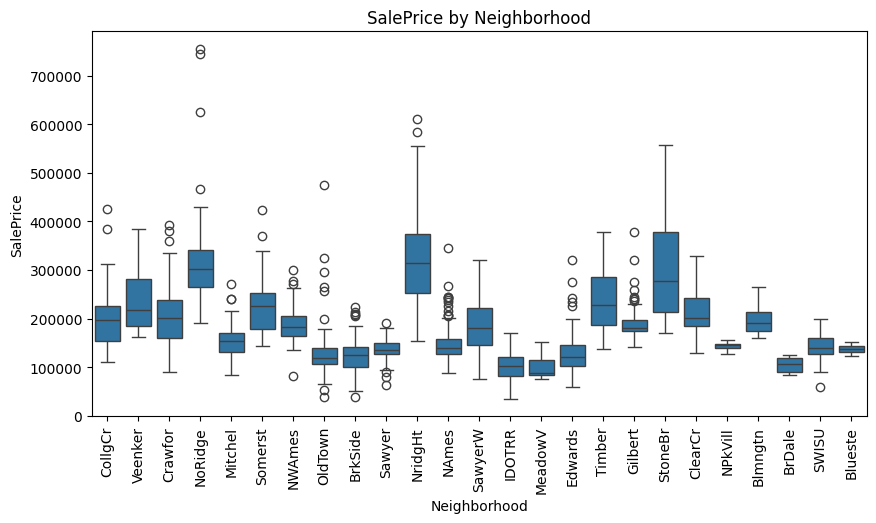

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=90)
plt.title('SalePrice by Neighborhood')
plt.show()


Section 2 Pre Processing

Goal: Remove or Replace Missing Values, Outliers and mixed data types.

In [20]:
df.isnull().sum().sort_values(ascending=False)


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


Filling In Missing Categorical data

In [21]:
none_cols = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType'
]

for col in none_cols:
    df[col].fillna('None', inplace=True)


/tmp/ipython-input-3236005829.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('None', inplace=True)


In [22]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)


/tmp/ipython-input-3447013771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
/tmp/ipython-input-3447013771.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

Replacing Missing Numerical Data with the median.

In [23]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)


/tmp/ipython-input-3660439204.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)


Handling Outliers

In [24]:
df = df[df['GrLivArea'] < 4000]


Removed identifier column

In [25]:
df.drop(columns=['Id'], inplace=True)


Heath Check

In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1456 non-null   int64  
 1   MSZoning       1456 non-null   object 
 2   LotFrontage    1456 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   Street         1456 non-null   object 
 5   Alley          1456 non-null   object 
 6   LotShape       1456 non-null   object 
 7   LandContour    1456 non-null   object 
 8   Utilities      1456 non-null   object 
 9   LotConfig      1456 non-null   object 
 10  LandSlope      1456 non-null   object 
 11  Neighborhood   1456 non-null   object 
 12  Condition1     1456 non-null   object 
 13  Condition2     1456 non-null   object 
 14  BldgType       1456 non-null   object 
 15  HouseStyle     1456 non-null   object 
 16  OverallQual    1456 non-null   int64  
 17  OverallCond    1456 non-null   int64  
 18  YearBuilt    

Can see no missing values

In [27]:
df.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.00000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,56.888736,69.570055,10448.784341,6.088599,5.576236,1971.18544,1984.819368,101.526786,436.991071,46.677198,...,93.833791,46.221154,22.014423,3.418956,15.102335,2.055632,43.608516,6.326236,2007.817308,180151.233516
std,42.358363,20.903753,9860.763449,1.369669,1.113966,30.20159,20.652143,177.011773,430.255052,161.522376,...,125.192349,65.352424,61.192248,29.357056,55.828405,35.383772,496.799265,2.698356,1.329394,76696.592530
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.00000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7538.750000,5.000000,5.000000,1954.00000,1966.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,69.000000,9468.500000,6.000000,5.000000,1972.00000,1993.500000,0.000000,381.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11588.000000,7.000000,6.000000,2000.00000,2004.000000,163.250000,706.500000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.00000,2010.000000,1600.000000,2188.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,625000.000000


See no crazy outliers



Section 3 Post Processing

goal: identify multicollinearity among numerical features and highlight highly correlated variables that may be considered for feature selection in future modeling

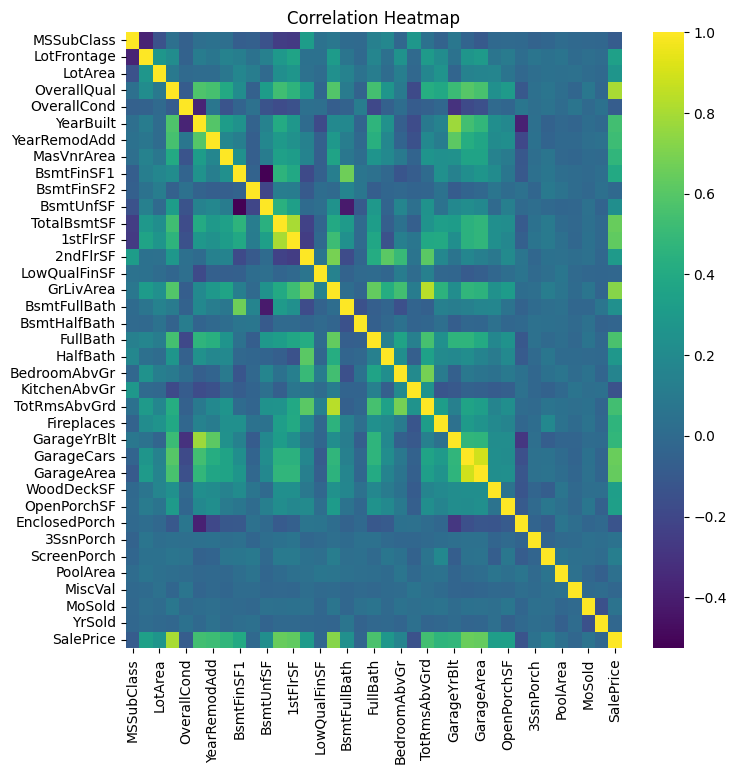

In [29]:
co = df.corr(numeric_only=True)

plt.figure(figsize=(8, 8))
sns.heatmap(co, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap reveals several pairs of highly correlated numerical features, indicating the presence of multicollinearity within the dataset. Although we would like to take out some of these variables to better see what is correlated

In [33]:
focused_features = [
    'GarageCars', 'GarageArea',
    'GrLivArea', 'TotRmsAbvGrd',
    'TotalBsmtSF', '1stFlrSF',
    'OverallQual', 'SalePrice'
]


finding the focused features and defining them

In [34]:
focused_corr = df[focused_features].corr()


Creating the focused correlation matrix

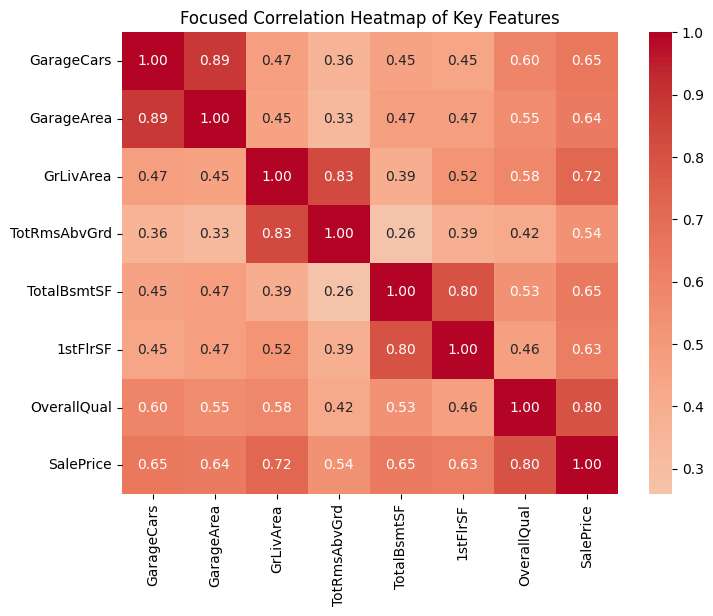

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(
    focused_corr,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f"
)
plt.title("Focused Correlation Heatmap of Key Features")
plt.show()


Notable highly correlated feature pairs include GarageCars and GarageArea, TotalBsmtSF and 1stFlrSF, and GrLivArea and TotRmsAbvGrd

In [31]:

corr_abs = co.abs()

upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))


high_pairs = (
    upper.stack()
         .sort_values(ascending=False)
         .reset_index()
)

high_pairs.columns = ["Feature 1", "Feature 2", "Abs Corr"]


threshold = 0.80
high_pairs[high_pairs["Abs Corr"] >= threshold].head(30)


,Feature 1,Feature 2,Abs Corr
0,GarageCars,GarageArea,0.886882
1,GrLivArea,TotRmsAbvGrd,0.833979
2,OverallQual,SalePrice,0.800858
3,TotalBsmtSF,1stFlrSF,0.800759


In [32]:
threshold = 0.80

to_drop = [col for col in upper.columns if any(upper[col] >= threshold)]
to_drop


['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice']

This section identified highly correlated features to flag redundant variables for future modeling decisions.